# Predictive Analytics

### Importing the Datasets and the libraries needed for the prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

la_2018_set = pd.read_pickle("Data/la_2018_set.pickle")
weather_set = pd.read_pickle("Data/weather_set.pickle")
feature_set = pd.read_pickle("Data/feature_set.pickle")

In [2]:
la_2018_set.head()

,start_time,end_time,start_station,end_station,bike_id,user_type,hour,week_day,day,month,trip_id,duration,start_coordinates,end_coordinates,distance,km/h,bike_type
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,0,0,01/01/2018,1,65406367,21,"(34.0492, -118.2528)","(34.0437, -118.2601)",0.91,2.6,standard
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,0,0,01/01/2018,1,65406366,20,"(34.0492, -118.2528)","(34.0437, -118.2601)",0.91,2.7,standard
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,0,0,01/01/2018,1,65406365,19,"(34.0492, -118.2528)","(34.0437, -118.2601)",0.91,2.9,standard
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,0,0,01/01/2018,1,65406364,22,"(34.0437, -118.2601)","(34.0447, -118.2524)",0.72,2.0,standard
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,0,0,01/01/2018,1,65406362,45,"(33.9884, -118.4516)","(34.0234, -118.4796)",4.67,6.2,standard


In [3]:
weather_set.head()

,date_time,max_temp,min_temp,precip,hour,week_day,day,month
0,2018-01-01 00:00:00,14.4,13.90,0.0,0,0,01/01/2018,1
1,2018-01-01 01:00:00,14.4,14.15,0.0,1,0,01/01/2018,1
2,2018-01-01 02:00:00,14.4,14.40,0.0,2,0,01/01/2018,1
3,2018-01-01 03:00:00,14.4,14.40,0.0,3,0,01/01/2018,1
4,2018-01-01 04:00:00,14.4,13.90,0.0,4,0,01/01/2018,1


In [4]:
feature_set.head()

,day,trips,minutes_driven,max_temp,precip,hours_of_precip,is_weekday
0,2018-01-01,779.0,51257.0,13.8,0.0,0.0,1
1,2018-01-02,777.0,22620.0,16.9,0.0,0.0,1
2,2018-01-03,722.0,23774.0,12.1,0.0,0.0,1
3,2018-01-04,643.0,26426.0,13.8,0.0,0.0,0
4,2018-01-05,711.0,18398.0,14.1,1.0,2.0,1


### Linear Regression as a Benchmark
Since linear regression is the most naive approach, we can use it as a benchmark for the more complex models. First, we need to split our dataset into training and test datasets. Since we wanted to make our result reproducible, we chose a specific random state. random_state 9626 was chosen because it splits the dataset into heterogeneous subsets. This is important because we have very few data points that relate to, for example, a day with precipitation. If these days are unevenly represented in the training set, we cannot accurately predict demand on these days.

In [5]:
X = feature_set["max_temp"]
y = feature_set["trips"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9626) 

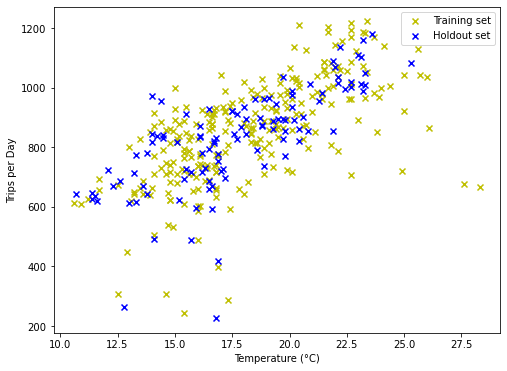

In [6]:
plt.figure(figsize = (8,6))
plt.scatter(X_train, y_train, marker='x', color="y")
plt.scatter(X_test, y_test, marker='x', color="b")
plt.xlabel("Temperature (°C)")
plt.ylabel("Trips per Day")
plt.legend(['Training set', 'Holdout set'])
plt.show()

In [7]:
model = LinearRegression(fit_intercept =True)
model.fit(X_train.values.reshape(-1,1),y_train)
model_pred = model.predict(X_test.values.reshape(-1,1))

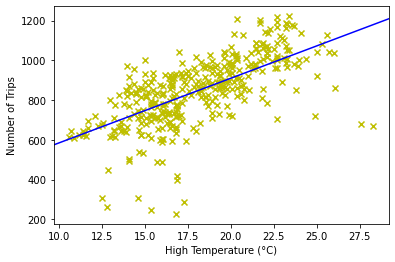

Coefficients  [32.5773347] 
Intercept  257.94261867559044


In [8]:
plt.scatter( X,y, marker = 'x', c='y')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

Z = np.linspace(9,30)
T = model.intercept_ + model.coef_*Z

plt.plot(Z,T, c="b")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("High Temperature (°C)")
plt.ylabel("Number of Trips")
plt.show()
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

In [9]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, model_pred))
print("MAE:", mean_absolute_error(y_test, model_pred))
print("R2: ", r2_score(y_test, model_pred))

Test set performance:
MSE: 14144.245708949607
MAE: 80.92840062690289
R2:  0.5155186255741276


In [10]:
X = feature_set["hours_of_precip"]
y = feature_set["trips"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9626)

In [11]:
model = LinearRegression(fit_intercept =True)
model.fit(X_train.values.reshape(-1,1),y_train)
model_pred = model.predict(X_test.values.reshape(-1,1))

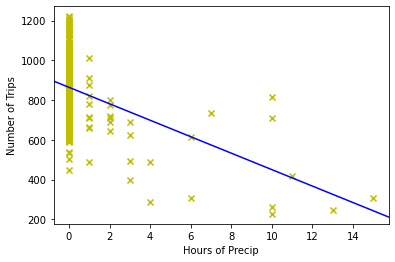

Coefficients  [-41.44260578] 
Intercept  864.3918403200221


In [12]:
plt.scatter( X,y, marker = 'x', c='y')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

Z = np.linspace(-1,16)
T = model.intercept_ + model.coef_*Z

plt.plot(Z,T, c="b")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("Hours of Precip")
plt.ylabel("Number of Trips")
plt.show()
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

In [13]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, model_pred))
print("MAE:", mean_absolute_error(y_test, model_pred))
print("R2: ", r2_score(y_test, model_pred))

Test set performance:
MSE: 19863.300979477463
MAE: 113.34245688250421
R2:  0.31962442132330016


As we can see, there is a positive linear relationship between the number of trips and the maximum temperature. On the other hand, there is a negative linear relationship between the hours of precipitation and the number of trips. As the number of precipitation hours increases, the maximum temperature becomes less and less important.

In [14]:
no_precip = feature_set[feature_set["precip"]==0]
X = no_precip["max_temp"]
y = no_precip["trips"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9626)

In [15]:
model = LinearRegression(fit_intercept =True)
model.fit(X_train.values.reshape(-1,1),y_train)
model_pred = model.predict(X_test.values.reshape(-1,1))

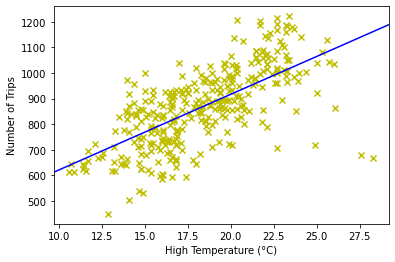

Coefficients  [29.60478087] 
Intercept  324.37394752313594


In [16]:
plt.scatter( X,y, marker = 'x', c='y')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

Z = np.linspace(9,30)
T = model.intercept_ + model.coef_*Z

plt.plot(Z,T, c="b")
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("High Temperature (°C)")
plt.ylabel("Number of Trips")
plt.show()
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

In [17]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, model_pred))
print("MAE:", mean_absolute_error(y_test, model_pred))
print("R2: ", r2_score(y_test, model_pred))

Test set performance:
MSE: 9415.225927098923
MAE: 79.63124091263273
R2:  0.5520256194724142


As we can see, the linear model fits the data even better if we exclude the days with precipitation. This becomes less problematic when we consider more than one feature at a time as dimensionality increases.

In [18]:
X = feature_set[["max_temp","hours_of_precip","is_weekday"]]
y = feature_set["trips"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9626)

In [19]:
model = LinearRegression( normalize=True)
model.fit(X_train,y_train)
model_pred = model.predict(X_test)
print("Coefficients ", model.coef_, "\nIntercept ", model.intercept_ )

Coefficients  [ 29.74318593 -28.75325962  30.66976151] 
Intercept  296.603337014021


In [20]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, model_pred))
print("MAE:", mean_absolute_error(y_test, model_pred))
print("R2: ", r2_score(y_test, model_pred))

Test set performance:
MSE: 8245.220860802505
MAE: 69.25730285996399
R2:  0.7175773090141597


As we can see, the R2 score is already quite high, which can be explained by the linear relationships between the features and the independent variable.

### Polynomial Regression
Often one encounters data where the relationship between the feature(s) and the dependet variable is not best described by a straight line, but by a polynomial regression. Therefore, it is of interest for which degree of polyinomial the model fits the data best.

In [21]:
# Polynomial regression with degree 1 ( equivalent to linear regression)
X = feature_set[["max_temp","hours_of_precip","is_weekday"]]
y = feature_set["trips"]
poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)


In [22]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)
print("Coefficients ", poly_reg_model.coef_, "\nIntercept ", poly_reg_model.intercept_ )

Coefficients  [ 29.74318593 -28.75325962  30.66976151] 
Intercept  296.60333701402055


In [23]:
print("Test set performance:")

print("MSE:", mean_squared_error(y_test, poly_reg_y_predicted))
print("MAE:", mean_absolute_error(y_test, poly_reg_y_predicted))
print("R2: ", r2_score(y_test, poly_reg_y_predicted))

Test set performance:
MSE: 8245.220860802505
MAE: 69.25730285996399
R2:  0.7175773090141597


Find degree d at which the model performs the best.

Text(0, 0.5, 'Mean squared error')

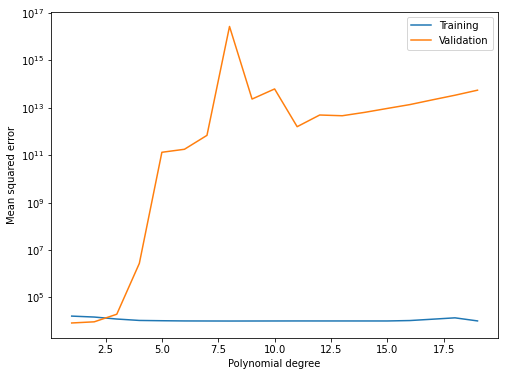

In [24]:
err_train = []
err_cv = []

for degree in range(1,20):

    # fit model
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_train, y_train)

    # compute errors
    err_train.append(mean_squared_error(poly_reg_model.predict(X_train), y_train))
    err_cv.append(mean_squared_error(poly_reg_model.predict(X_test), y_test))

plt.figure(figsize = (8,6))
plt.semilogy(range(1,20), err_train, range(1, 20), err_cv)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Text(0, 0.5, 'Mean squared error')

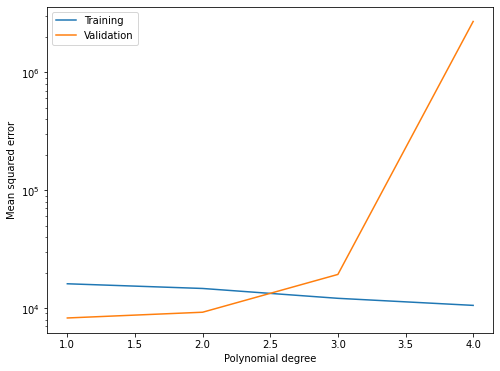

In [25]:
err_train = []
err_cv = []

for degree in range(1,5):

    # fit model
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_train, y_train)

    # compute errors
    err_train.append(mean_squared_error(poly_reg_model.predict(X_train), y_train))
    err_cv.append(mean_squared_error(poly_reg_model.predict(X_test), y_test))

plt.figure(figsize = (8,6))
plt.semilogy(range(1,5), err_train, range(1, 5), err_cv)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

The validation error increases with higher degree of the polynomial. Therefore, it is not possible for us to improve the R2 score by non-linear regression withour regulation. This  means that regulation by lasso regression (L1) or ride regression (L2) could be necessary.

### LASSO regression ($L_1$ regularization)
We can also illustrate the effects of regularization as they relate to training and validation performance.  Just as we did with the degree of the polynomial, we can consider the training and validation errors for different amounts of regularization.

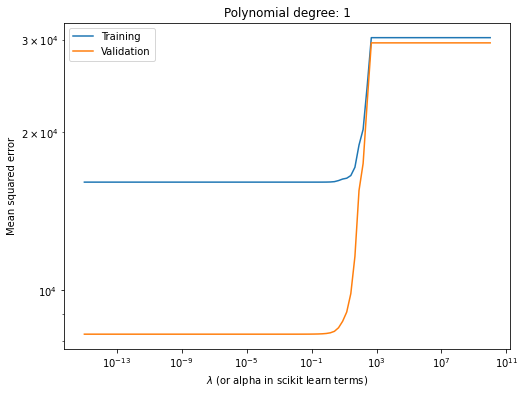

Validation error is minimal for regularization parameter alpha≈0.0000.

Coefficients  [ 29.74318593 -28.75325962  30.66976151] 
Intercept  296.6033370140208

Test set performance:
MSE: 8245.220860802503
MAE: 69.25730285996399
R2:  0.7175773090141598


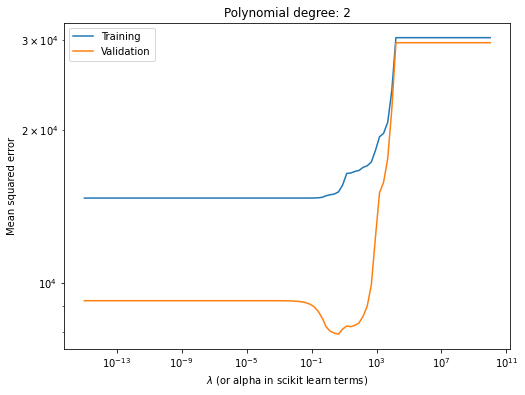

Validation error is minimal for regularization parameter alpha≈4.5349.

Coefficients  [64.35021398  0.         -0.         -0.96957542 -3.09851337  1.85405979
  2.04748074 -9.68646493 -0.        ] 
Intercept  -1.4896654016912407

Test set performance:
MSE: 7920.840035151889
MAE: 69.65670957522917
R2:  0.7286882916344044


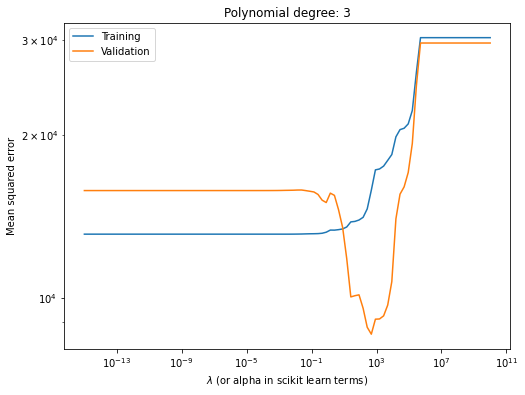

Validation error is minimal for regularization parameter alpha≈475.0810.

Coefficients  [ 0.         -0.         -0.          1.16200899 -0.          0.
  0.         -0.         -0.         -0.01711553 -0.1661653   0.10490936
  0.03093864 -0.          0.         -0.         -0.         -0.
 -0.        ] 
Intercept  551.2389407703288

Test set performance:
MSE: 8552.96032109051
MAE: 71.53156682168604
R2:  0.7070363413476357


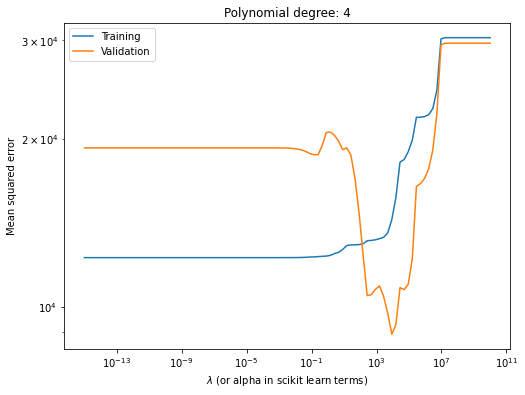

Validation error is minimal for regularization parameter alpha≈8697.4900.

Coefficients  [ 0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.          0.11022587 -0.          0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.         -0.00330262 -0.01099769  0.00441684  0.00384989 -0.
  0.          0.         -0.         -0.          0.         -0.00199095
 -0.         -0.         -0.         -0.        ] 
Intercept  546.6623455176765

Test set performance:
MSE: 8929.554782802548
MAE: 71.80405566671949
R2:  0.6941368904920857


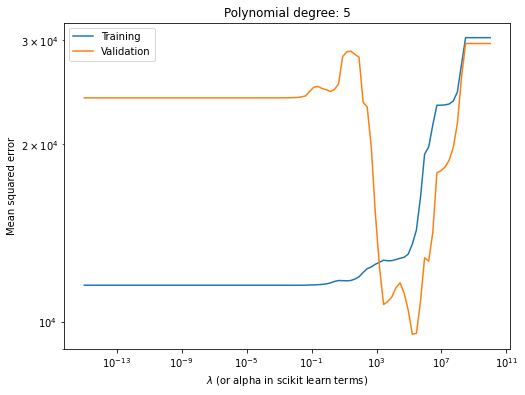

Validation error is minimal for regularization parameter alpha≈159228.2793.

Coefficients  [ 0.         -0.          0.          0.         -0.          0.
  0.         -0.          0.          0.         -0.          0.
  0.         -0.          0.          0.         -0.         -0.
  0.          0.00600854 -0.          0.          0.         -0.
  0.          0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.          0.         -0.00020156 -0.00068235
  0.0001512   0.00024599 -0.          0.          0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.         -0.00021214 -0.         -0.         -0.         -0.
  0.        ] 
Intercept  599.3062128574729

Test set performance:
MSE: 9530.91339680389
MAE: 73.64481668774756
R2:  0.6735386165487915


In [28]:
ideal_r2_score_lasso = 0
ideal_degree_lasso = 1
ideal_alpha_lasso = 0
    
for degree in range(1,6):

    # fit model
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)
    
    err_train = []
    err_cv = []
    
    ideal_r2_score = 0
    
    for alpha in np.logspace(-15,10,100):
    
        # fit model
        model_L1 = Lasso(alpha = alpha)
        model_L1.fit(X_train, y_train)
    
        # compute errors
        err_train.append(mean_squared_error(model_L1.predict(X_train), y_train))
        
        prediction = model_L1.predict(X_test)
        err_cv.append(mean_squared_error(prediction, y_test))
        
       
        
        if(r2_score(y_test, prediction) > ideal_r2_score):
            ideal_r2_score = r2_score(y_test, prediction)
            ideal_alpha = alpha
    
    #Plot errors
    plt.figure(figsize = (8,6))
    plt.loglog(np.logspace(-15,10,100), err_train, np.logspace(-15,10,100), err_cv)
    plt.title(f"Polynomial degree: {degree}")
    plt.legend(["Training", "Validation"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()
    
    print(f"Validation error is minimal for regularization parameter alpha≈{ideal_alpha:.4f}.")
    
    # fit with ideal para
    model_L1 = Lasso(alpha = ideal_alpha)
    model_L1.fit(X_train, y_train)
    prediction = model_L1.predict(X_test)
    print("\nCoefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )
    
    print("\nTest set performance:")

    print("MSE:", mean_squared_error(y_test, prediction))
    print("MAE:", mean_absolute_error(y_test, prediction))
    print("R2: ", r2_score(y_test, prediction))
    
    if(ideal_r2_score > ideal_r2_score_lasso): 
        ideal_r2_score_lasso = ideal_r2_score
        ideal_degree_lasso = degree
        ideal_alpha_lasso = ideal_alpha

In [29]:
print("Ideal hyperparameters for LASSO regression:")
print(f"Degree of polynomial: {ideal_degree_lasso}")
print(f"Regularization parameter alpha: {ideal_alpha_lasso:.4f}")

Ideal hyperparameters for LASSO regression:
Degree of polynomial: 2
Regularization parameter alpha: 4.5349


In [30]:
poly = PolynomialFeatures(degree=ideal_degree_lasso, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)

In [31]:
model_L1 = Lasso(alpha = ideal_alpha_lasso)
model_L1.fit(X_train, y_train)
prediction = model_L1.predict(X_test)
print("Coefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )

Coefficients  [64.35021398  0.         -0.         -0.96957542 -3.09851337  1.85405979
  2.04748074 -9.68646493 -0.        ] 
Intercept  -1.4896654016912407


In [32]:
print("Test set performance for ideal hyperparameters:")

print("MSE:", mean_squared_error(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))
print("R2: ", r2_score(y_test, prediction))

Test set performance for ideal hyperparameters:
MSE: 7920.840035151889
MAE: 69.65670957522917
R2:  0.7286882916344044


### Ridge regression ($L_2$ Regularization)

We can also illustrate the effects of regularization as they relate to training and validation performance.  Just as we did with the degree of the polynomial, we can consider the training and validation errors for different amounts of regularization.

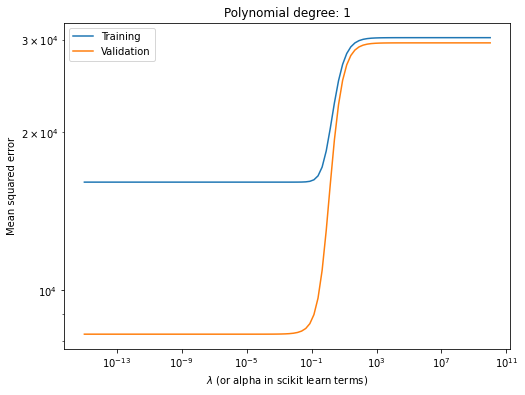

Validation error is minimal for regularization parameter alpha≈0.0000.

Coefficients  [ 29.74318593 -28.75325962  30.66976151] 
Intercept  296.60333701402067

Test set performance:
MSE: 8245.220860802508
MAE: 69.25730285996399
R2:  0.7175773090141597


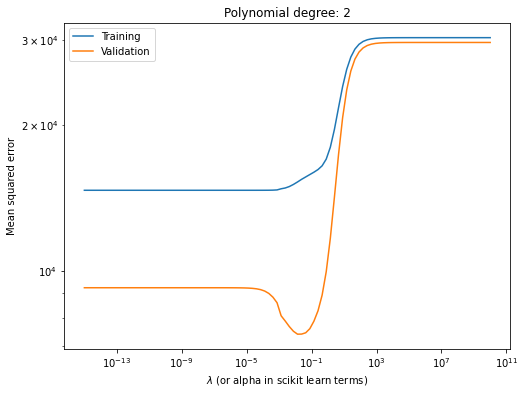

Validation error is minimal for regularization parameter alpha≈0.0135.

Coefficients  [ 37.24137288  -6.29897725 -40.09830445  -0.33379938  -2.36091419
   6.2787819    2.27095086 -18.67398633 -40.09830445] 
Intercept  273.99979323998923

Test set performance:
MSE: 7396.041230794517
MAE: 66.71226205962019
R2:  0.746664170395563


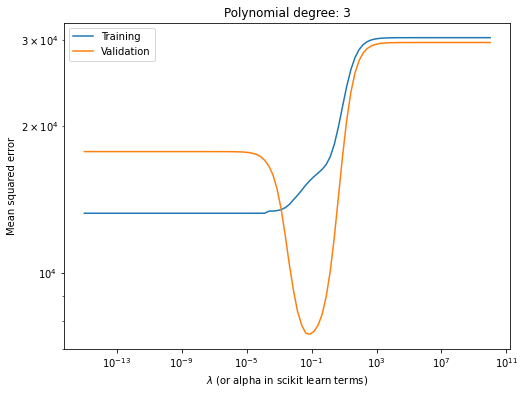

Validation error is minimal for regularization parameter alpha≈0.0774.

Coefficients  [ 1.95994771e+01 -6.32339997e+00 -1.86861543e+01  2.22894287e-01
 -7.34430138e-01  1.61543713e+00  6.19610341e-01 -4.63170408e+00
 -1.86861543e+01 -4.19895990e-03 -7.56249480e-02  9.69313251e-02
  6.04136961e-02 -7.40233150e-01  1.61543713e+00  1.62181402e-03
  1.94093640e-01 -4.63170408e+00 -1.86861543e+01] 
Intercept  430.7512469891676

Test set performance:
MSE: 7505.202419468172
MAE: 67.91390310451138
R2:  0.7429250835746155


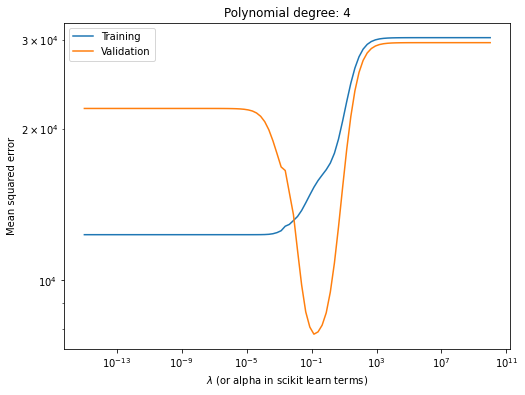

Validation error is minimal for regularization parameter alpha≈0.1385.

Coefficients  [ 1.59988054e+01 -4.55895746e+00 -1.41022883e+01  2.54386299e-01
 -4.45257883e-01  8.68299682e-01  3.40167974e-01 -1.73715835e+00
 -1.41022883e+01  1.97340334e-03 -4.19378220e-02  5.64431763e-02
  3.39339927e-02 -3.09517032e-01  8.68299682e-01  3.97762660e-03
  2.03771618e-01 -1.73715835e+00 -1.41022883e+01 -1.96892348e-04
 -3.75978908e-03  1.04440175e-03  2.87460987e-03 -3.89722459e-02
  5.64431763e-02  1.30565120e-03  2.27926319e-02 -3.09517032e-01
  8.68299682e-01 -2.32355343e-03 -2.11631517e-02  2.03771618e-01
 -1.73715835e+00 -1.41022883e+01] 
Intercept  470.32699622330153

Test set performance:
MSE: 7815.316053413358
MAE: 69.29417504136222
R2:  0.7323027935852031


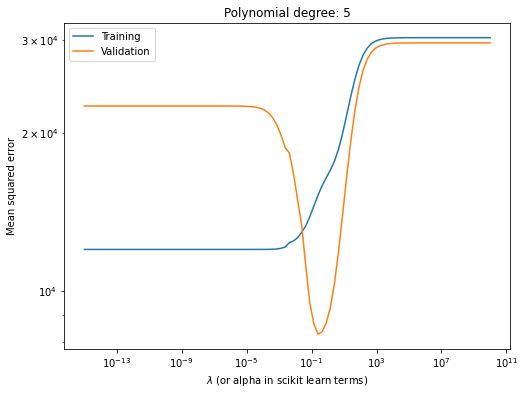

Validation error is minimal for regularization parameter alpha≈0.2477.

Coefficients  [ 1.25146781e+01 -3.28754236e+00 -1.12557922e+01  2.32707384e-01
 -2.97462079e-01  5.33983162e-01  1.96053599e-01 -7.49385800e-01
 -1.12557922e+01  4.02748025e-03 -2.63597621e-02  4.07733035e-02
  1.84280372e-02 -1.56226935e-01  5.33983162e-01  5.64236709e-03
  1.72438765e-01 -7.49385800e-01 -1.12557922e+01 -8.01059719e-06
 -2.25658562e-03  1.13636675e-03  1.50869993e-03 -2.04696587e-02
  4.07733035e-02  8.94888287e-04  1.61096844e-02 -1.56226935e-01
  5.33983162e-01 -9.09975208e-04 -6.04009431e-03  1.72438765e-01
 -7.49385800e-01 -1.12557922e+01 -6.50701643e-06 -1.85538405e-04
 -1.35180937e-05  1.11253063e-04 -2.19598798e-03  1.13636675e-03
  9.59873009e-05  1.28579955e-03 -2.04696587e-02  4.07733035e-02
 -3.96514436e-05 -7.33488048e-05  1.61096844e-02 -1.56226935e-01
  5.33983162e-01 -1.46593761e-04 -1.82959350e-03 -6.04009431e-03
  1.72438765e-01 -7.49385800e-01 -1.12557922e+01] 
Intercept  519.416

In [33]:
ideal_r2_score_ridge = 0
ideal_degree_ridge = 0
ideal_alpha_ridge = 0
    
for degree in range(1,6):

    # fit model
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)
    
    err_train = []
    err_cv = []
    
    ideal_r2_score = 0
    
    for alpha in np.logspace(-15,10,100):
    
        # fit model
        model_L2 = Ridge(alpha = alpha, normalize = True, solver = 'lsqr') # select least squares regression as solver
        model_L2.fit(X_train, y_train)
    
        # compute errors
        err_train.append(mean_squared_error(model_L2.predict(X_train), y_train))
        
        prediction = model_L2.predict(X_test)
        err_cv.append(mean_squared_error(prediction, y_test))
        
       
        
        if(r2_score(y_test, prediction) > ideal_r2_score):
            ideal_r2_score = r2_score(y_test, prediction)
            ideal_alpha = alpha
    
    #Plot errors
    plt.figure(figsize = (8,6))
    plt.loglog(np.logspace(-15,10,100), err_train, np.logspace(-15,10,100), err_cv)
    plt.title(f"Polynomial degree: {degree}")
    plt.legend(["Training", "Validation"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()
    
    print(f"Validation error is minimal for regularization parameter alpha≈{ideal_alpha:.4f}.")
    
    # fit with ideal para
    model_L2 = Ridge(alpha = ideal_alpha, normalize = True, solver = 'lsqr')
    model_L2.fit(X_train, y_train)
    prediction = model_L2.predict(X_test)
    print("\nCoefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )
    
    print("\nTest set performance:")

    print("MSE:", mean_squared_error(y_test, prediction))
    print("MAE:", mean_absolute_error(y_test, prediction))
    print("R2: ", r2_score(y_test, prediction))
    
    if(ideal_r2_score > ideal_r2_score_ridge): 
        ideal_r2_score_ridge = ideal_r2_score
        ideal_degree_ridge = degree
        ideal_alpha_ridge = ideal_alpha

In [34]:
print("Ideal hyperparameters for ride regression:")
print(f"Degree of polynomial: {ideal_degree_ridge}")
print(f"Regularization parameter alpha: {ideal_alpha_ridge:.4f}")

Ideal hyperparameters for ride regression:
Degree of polynomial: 2
Regularization parameter alpha: 0.0135


In [35]:
poly = PolynomialFeatures(degree=ideal_degree_ridge, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=9626)

In [36]:
model_L2 = Ridge(alpha = ideal_alpha_ridge, normalize = True, solver = 'lsqr')
model_L2.fit(X_train, y_train)
prediction = model_L2.predict(X_test)
print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )

Coefficients  [ 37.24137288  -6.29897725 -40.09830445  -0.33379938  -2.36091419
   6.2787819    2.27095086 -18.67398633 -40.09830445] 
Intercept  273.99979323998923


In [37]:
print("Test set performance for ideal hyperparameters:")

print("MSE:", mean_squared_error(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))
print("R2: ", r2_score(y_test, prediction))

Test set performance for ideal hyperparameters:
MSE: 7396.041230794517
MAE: 66.71226205962019
R2:  0.746664170395563
